# Parameter Estimation

In this example we analyze the catalytic oxidation data obtained by a group of students in senior lab. Under CSTR conditions they measured outlet concentrations for three different reactor feed concentrations. The data for the three feeds cr0 are given below.

In [2]:
Ta = [423, 449, 471, 495, 518, 534, 549, 563]
cra = [1.66E-04, 1.66E-04, 1.59E-04, 1.37E-04, 8.90E-05, 5.63E-05, 3.04E-05, 1.71E-05]
cr0a = 1.64E-4

Tb = [423, 446, 469, 490, 507, 523, 539, 553, 575]
crb = [3.73E-04, 3.72E-04, 3.59E-04, 3.26E-04, 2.79E-04, 2.06E-04, 1.27E-04, 7.56E-05, 3.76E-05]
cr0b = 3.69e-4

Tc = [443, 454, 463, 475, 485, 497, 509, 520, 534, 545, 555, 568]
crc = [2.85E-04, 2.84E-04, 2.84E-04, 2.74E-04, 2.57E-04, 2.38E-04, 2.04E-04, 1.60E-04, 1.12E-04, 6.37E-05, 5.07E-05, 4.49E-05]
cr0c = 2.87e-4

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin

In [4]:
data = {
    'Expt A': {
        'Cr0': 1.64E-4,
        'T':   [423, 449, 471, 495, 518, 534, 549, 563],
        'Cr':  [1.66E-04, 1.66E-04, 1.59E-04, 1.37E-04, 8.90E-05, 5.63E-05, 3.04E-05,
                1.71E-05],
    },
    'Expt B': {
        'Cr0': 3.69e-4 ,
        'T':   [423, 446, 469, 490, 507, 523, 539, 553, 575],
        'Cr':  [3.73E-04, 3.72E-04, 3.59E-04, 3.26E-04, 2.79E-04, 2.06E-04, 1.27E-04, 
                7.56E-05, 3.76E-05],     
    },
    'Expt C': {
        'Cr0': 2.87e-4,
        'T':   [443, 454, 463, 475, 485, 497, 509, 520, 534, 545, 555, 568],
        'Cr':  [2.85E-04, 2.84E-04, 2.84E-04, 2.74E-04, 2.57E-04, 2.38E-04, 2.04E-04,
                1.60E-04, 1.12E-04, 6.37E-05, 5.07E-05, 4.49E-05],         
    },
}

We can calculate conversion ratios for these three runs:

In [5]:
xa = 1 - np.array(cra)/cr0a
xb = 1 - np.array(crb)/cr0b
xc = 1 - np.array(crc)/cr0c

In [6]:
for expt in data:
    data[expt]['T'] = np.array(data[expt]['T'])
    data[expt]['Cr'] = np.array(data[expt]['Cr'])
    data[expt]['X'] = 1 - data[expt]['Cr']/data[expt]['Cr0']

data

{'Expt A': {'Cr0': 0.000164,
  'T': array([423, 449, 471, 495, 518, 534, 549, 563]),
  'Cr': array([1.66e-04, 1.66e-04, 1.59e-04, 1.37e-04, 8.90e-05, 5.63e-05,
         3.04e-05, 1.71e-05]),
  'X': array([-0.01219512, -0.01219512,  0.0304878 ,  0.16463415,  0.45731707,
          0.65670732,  0.81463415,  0.89573171])},
 'Expt B': {'Cr0': 0.000369,
  'T': array([423, 446, 469, 490, 507, 523, 539, 553, 575]),
  'Cr': array([3.73e-04, 3.72e-04, 3.59e-04, 3.26e-04, 2.79e-04, 2.06e-04,
         1.27e-04, 7.56e-05, 3.76e-05]),
  'X': array([-0.01084011, -0.00813008,  0.02710027,  0.11653117,  0.24390244,
          0.44173442,  0.65582656,  0.79512195,  0.89810298])},
 'Expt C': {'Cr0': 0.000287,
  'T': array([443, 454, 463, 475, 485, 497, 509, 520, 534, 545, 555, 568]),
  'Cr': array([2.85e-04, 2.84e-04, 2.84e-04, 2.74e-04, 2.57e-04, 2.38e-04,
         2.04e-04, 1.60e-04, 1.12e-04, 6.37e-05, 5.07e-05, 4.49e-05]),
  'X': array([0.00696864, 0.01045296, 0.01045296, 0.04529617, 0.10452962,
     

and we can plot them up:

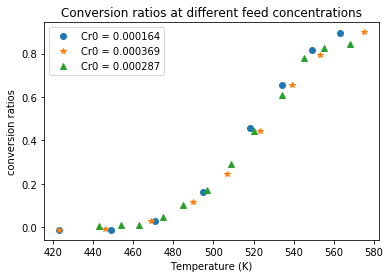

In [7]:
plt.plot(Ta, xa, 'o', Tb, xb, '*', Tc, xc, '^')
plt.xlabel('Temperature (K)')
plt.ylabel('conversion ratios')
plt.legend(['Cr0 = ' + str(cr0a), 'Cr0 = ' + str(cr0b), 'Cr0 = ' + str(cr0c)])
plt.title('Conversion ratios at different feed concentrations');

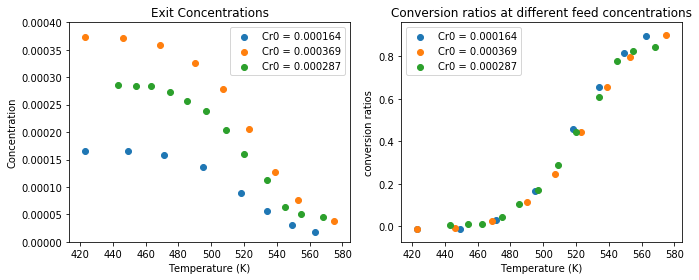

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
for expt in data:
    plt.scatter(data[expt]['T'], data[expt]['Cr'])
plt.ylim([0.0000, 0.0004])
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')
plt.legend(['Cr0 = ' + str(data[expt]['Cr0']) for expt in data])
plt.title('Exit Concentrations')

plt.subplot(1,2,2)
for expt in data:
    plt.scatter(data[expt]['T'], data[expt]['X'])
plt.xlabel('Temperature (K)')
plt.ylabel('conversion ratios')
plt.legend(['Cr0 = ' + str(data[expt]['Cr0']) for expt in data])
plt.title('Conversion ratios at different feed concentrations')

plt.tight_layout()

Looking at this plot, we can immediately see why the standard technique for analyzing the reaction data will run into trouble. Even with interpolation, it will be very hard to get accurate values of the conversion at different concentrations for fixed temperatures. To use non-linear regression to get at the fitting parameters, we will have to define an objective function for minimization, as well as some initial guesses for the parameters. We can pass the data into the objective function using the "global" meat axe:

\begin{align*}
0 & = q_r(C_0 - C) - m k_0 C^n \left(\frac{T}{T_r}\right)^n e^{-\frac{E_a}{RT}}
\end{align*}

\begin{align*}
C & = C_0 - \frac{m}{q_r} k_0 C^n f(n,T)
\end{align*}

\begin{align*}
\frac{C_0 - C}{C^n} & = \frac{m}{q_r} k_0 f(n,T)
\end{align*}

\begin{align*}
X & = \frac{C_0 - C}{C_0} \quad \implies \quad C = C_0(1-X)
\end{align*}

\begin{align*}
\frac{XC_0^{1-n}}{(1-X)^n} & = \frac{m}{q_r} k_0 f(n,T)
\end{align*}



In [52]:
Tpass = np.array(Ta + Tb + Tc)
crpass = np.array(cra + crb + crc)
cr0pass = np.array([cr0a]*len(Ta) + [cr0b]*len(Tb) + [cr0c]*len(Tc))

(-7.408248413017396, -0.8802298976739141)

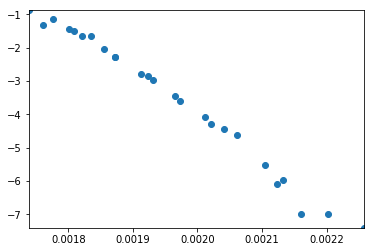

In [103]:
T = np.hstack([data[expt]['T'] for expt in data])
Cr = np.hstack([data[expt]['Cr'] for expt in data])
Cr0 = np.hstack([[data[expt]['Cr0']]*len(data[expt]['Cr']) for expt in data])

n = .7

Y = (Cr0 - C)/C**n
idx = Y > 0
T = T[idx]
Y = Y[idx]
plt.scatter(1/T, np.log(Y))
plt.xlim(min(1/T), max(1/T))
plt.ylim(min(np.log(Y)), max(np.log(Y)))



OK, the question is how to weight each of the data points.  As it is currently written, it tends to accentuate the weighting at higher temperatures where the conversion is the largest.  This is because cr is lowest, and it is multiplied by a large value to make it balance cr0.  It also places a stronger weight on the runs with higher intial concentrations.  On the other hand, for lower cr we should have more accurate measurements (if the fractional error is fixed, for example). Different weightings will yield different "solutions" for optimal parameters.

A reasonable choice is to weight each of the runs with the inverse of the initial concentration.  This is essentially equivalent to assuming an error proportional to the concentration measured, and each data point should be of O(1).  Thus:

Optimization terminated successfully.
         Current function value: 0.358833
         Iterations: 110
         Function evaluations: 196
0.6152410813603015 15.09201364186368 36.08887455763691


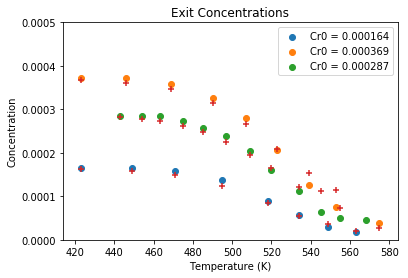

In [51]:
Tr = 298    # The reference temperature.
qr = 0.1    # The flow rate (liters/min)
m = 1       # The amount of catalyst (g)

def Cr_model(n, lnk0, ERTr):
    return Cr0 - (m/qr) * Cr**n  * np.exp(lnk0) * (Tr/T)**n * np.exp(-ERTr*Tr/T)

def err(parameters):
    n, lnk0, ERTr = parameters
    return np.linalg.norm((Cr_model(n, lnk0, ERTr) - Cr)/Cr0)

n, lnk0, ERTr = fmin(err, [1, 15, 38])

for expt in data:
    plt.scatter(data[expt]['T'], data[expt]['Cr'])
plt.ylim([0.0000, 0.0004])
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')
plt.legend(['Cr0 = ' + str(data[expt]['Cr0']) for expt in data])
plt.title('Exit Concentrations')

plt.scatter(T, Cr_model(n, lnk0, ERTr), marker='+')
plt.ylim(0,.0005)
print(n, lnk0, ERTr)

In [27]:
def delta(parameters):
    """
    This function takes in guesses for the unknown parameters n, ln(k0) and
    E/RTr, and returns the deviation between the model and the data.
    """
    # extract parameters
    n, lnk0, ERTr = parameters

    model = cr0pass - (m/qr) * crpass**n  * np.exp(lnk0) * (Tr/Tpass)**n * np.exp(-ERTr*Tr/Tpass)
    err = crpass - model

    err = err/cr0pass;
    
    return sum(err*err)

In [152]:
import scipy.optimize

Tr = 298    # The reference temperature.
qr = 0.1    # The flow rate (liters/min)
m = 1       # The amount of catalyst (g)

guess = [1, 15, 38]

guess_opt = scipy.optimize.fmin(delta, guess)
guess_opt

Optimization terminated successfully.
         Current function value: 0.128761
         Iterations: 110
         Function evaluations: 196


array([ 0.61524108, 15.09201364, 36.08887456])

OK, we've got the model and the data for the function x/(1-x)^n/cr0^(n-1). It should be independent of the concentration. Let's plot it up:

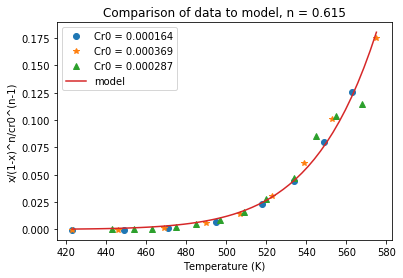

In [153]:
n, lnk0, ERTr = guess_opt
Trange = np.linspace(min(Tpass), max(Tpass))
xmodel = (m/qr) * (Tr/Trange)**n * np.exp(lnk0) * np.exp(-ERTr*Tr/Trange)

xafn = xa/(1-xa)**n/cr0a**(n-1)
xbfn = xb/(1-xb)**n/cr0b**(n-1)
xcfn = xc/(1-xc)**n/cr0c**(n-1)

plt.plot(Ta, xafn, 'o', Tb, xbfn, '*', Tc, xcfn, '^', Trange, xmodel)
plt.xlabel('Temperature (K)')
plt.ylabel('x/(1-x)^n/cr0^(n-1)')
plt.legend(['Cr0 = ' + str(cr0a), 'Cr0 = ' + str(cr0b), 'Cr0 = ' + str(cr0c), 'model'])
plt.title('Comparison of data to model, n = ' + str(round(n,3)));

Which shows that we get pretty much perfect collapse of the data.

Now we turn to the trickier error calculations.  First, we need to get a measure of the uncertainty in the concentration measurements.  We can get
this from the magnitude of the "miss" in the data:

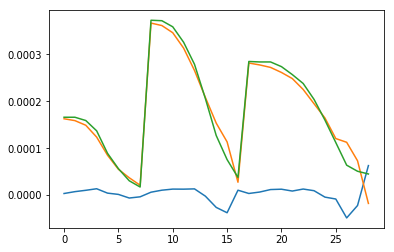

In [154]:
miss = crpass - cr0pass + (m/qr)*crpass**n * np.exp(lnk0) * (Tr/Tpass)**n * np.exp(-ERTr*Tr/Tpass)
plt.plot(miss)
plt.plot(model)
plt.plot(crpass)

We must adjust this to account for the relative weighting of the data.  In this case, a rough correction for the actual fractional deviation in cr is given by:

In [155]:
miss = (miss/cr0pass) * (crpass/cr0pass)

Thus we get the fractional standard deviation (assuming randomness) of:

In [156]:
crstdev = np.linalg.norm(miss, 2)/np.sqrt(len(Tpass)-3)
crstdev

0.031158706084201376

Which yields a fractional error of around 3% - not too bad.  Note that these  deviations could have been due to errors in the temperature just as readily!

OK, it is always important to plot up the residuals to see if the error is really random.  It is useful to plot up the actual cr's and predicted cr's.  Alas, we have an implicit equation for the predicted cr's which cannot be solved analytically.  Instead, we shall use the "miss" from the minimization routine.  We need the range of indices corresponding to each data set:

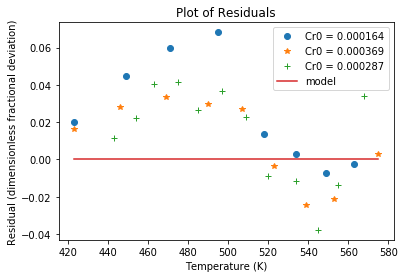

In [157]:
a = range(0, len(Ta))
b = range(len(Ta), len(Ta) + len(Tb))
c = range(len(Ta) + len(Tb), len(Ta) + len(Tb) + len(Tc))
plt.plot(Ta,miss[a],'o',Tb,miss[b],'*',Tc,miss[c],'+')
plt.plot(Trange,np.zeros(len(Trange)))

plt.xlabel('Temperature (K)')
plt.ylabel('Residual (dimensionless fractional deviation)')
plt.title('Plot of Residuals')
plt.legend(['Cr0 = ' + str(cr0a), 'Cr0 = ' + str(cr0b), 'Cr0 = ' + str(cr0c), 'model'])

As you can see, there is a pretty significant systematic deviation between the model and the data.  That means that the random error in cr is *overestimated* (it's less than 3%) while assuming the data to be dominated by independent random error will lead to errors in fitting parameters to be underestimated!  It also means that there is something going on which is not captured by the model - not a big surprise.

OK, we still want to measure the sensitivity of the calculated values to errors in measured concentrations.  This can be done by taking the derivative of the fitted values with respect to each of the data points (not forgetting the initial concentrations, which have error too!). First, let's do the cr's:

In [172]:
crkeep = crpass
gradfcr = np.zeros([3,len(Tpass)])  # The array where we stuff the gradient.

for j in range(len(Tpass)):
    crpass = crkeep
    ep = crpass[j]*crstdev  # The amount we change the j'th data point by.
    crpass[j] = crpass[j] + ep
    # Now we calculate new values of the fitted parameters:
    newguess = scipy.optimize.fmin(delta, guess_opt, disp=False)
    gradfcr[:,j] = (newguess-guess_opt)/ep  # The gradient.

And we do the same for the initial concentrations:

In [180]:
crpass=crkeep;
gradfcr0 = np.zeros([3,3])  # We had three initial concentrations.

cr0pass = np.array([cr0a*(1+crstdev)]*len(Ta) + [cr0b]*len(Tb) + [cr0c]*len(Tc))
gradfcr0[:,0] = (scipy.optimize.fmin(delta, guess, disp=False) - guess_opt)/(crstdev*cr0a)

cr0pass = np.array([cr0a]*len(Ta) + [cr0b*(1+crstdev)]*len(Tb) + [cr0c]*len(Tc))
gradfcr0[:,1] = (scipy.optimize.fmin(delta, guess, disp=False) - guess_opt)/(crstdev*cr0b)

cr0pass = np.array([cr0a]*len(Ta) + [cr0b]*len(Tb) + [cr0c*(1+crstdev)]*len(Tc))
gradfcr0[:,2] = (scipy.optimize.fmin(delta, guess, disp=False) - guess_opt)/(crstdev*cr0c)

and we put cr0pass back again:

In [181]:
cr0pass = np.array([cr0a]*len(Ta) + [cr0b]*len(Tb) + [cr0c]*len(Tc))

That gives us the sensitivity gradients.  To complete the problem, we need to determine the matrix of covariance of the concentration measurements. This is a little more "iffy" because we -know- that they are not really random!  Still, if we make the randomness assumption, we can get an estimate of the matrix of covariance of the fitting parameters.

In [184]:
varcr = np.diag((crstdev*crpass)**2)
varcr0 = np.diag((np.array([cr0a,cr0b,cr0c])*crstdev)**2)

Note that we multiply by the value of cr, etc., as crstdev was an estimate of the -fractional- standard deviation!

These will both contribute to the uncertainty.  We can look at each separately.  First, from cr:

In [191]:
var1 = np.dot(np.dot(gradfcr, varcr), gradfcr.T)
var1

array([[ 6.77411036e-02, -5.89757824e+00, -1.30488159e+01],
       [-5.89757824e+00,  5.63575678e+02,  1.23448271e+03],
       [-1.30488159e+01,  1.23448271e+03,  2.70689636e+03]])

and now from cr0:

In [192]:
var2 = np.dot(np.dot(gradfcr0, varcr0), gradfcr0.T)
var2

array([[ 1.50995338e-02, -6.78734845e-01, -1.66035844e+00],
       [-6.78734845e-01,  4.73651338e+01,  1.07716777e+02],
       [-1.66035844e+00,  1.07716777e+02,  2.47505810e+02]])

Note that the error due to the initial concentrations is actually greater than that due to all the reactor outlet measurements put together!  That's because it is used in every calculated value of the fitting parameters, while the "randomness" of the outlet measurements gets averaged out.

Putting these two together yields an estimate of the variance:

In [197]:
var = var1 + var2
var

array([[ 8.28406374e-02, -6.57631308e+00, -1.47091743e+01],
       [-6.57631308e+00,  6.10940812e+02,  1.34219949e+03],
       [-1.47091743e+01,  1.34219949e+03,  2.95440217e+03]])

and the fitting parameters + error:

In [198]:
[guess_opt, np.diag(var)**0.5]

[array([ 0.61524108, 15.09201364, 36.08887456]),
 array([ 0.2878205 , 24.71721691, 54.35441261])]

which, I would guess, gives a reasonable measure of the random uncertainty  in the values.  This is because the uncertainty in cr0 (which is probably overestimated) dominates the calculation, while the "randomness assumption" underestimates the contribution due to error in cr.  The total error will be greater due to other contributions not considered here.  In particular, calibration errors will yield systematic error not observable from the residuals!

So, in conclusion, the fractional exponent lies within approximately two standard deviations of the literature value of 0.5, and the activation energy is also within two sigma of 38.5 (at Tr=298K).  Error estimates could be improved by having independent estimates of the uncertainty in cr0 (the dominant source), by modeling the matrix of covariance in cr, and by studying the effect of errors in the other parameters in the problem, such as T, qr, and m.  You can also study how the modeling parameters change if you leave cr0 as an additional adjustable parameter in the model, and simply add its normalized deviation from the measured value as an additional contribution to the objective function.  That would decrease the model dependence on these few particular data points, and might actually decrease the parameter error bars and reduce the systematic deviation in the residual.  To get the most out of your data, you need to think about the analysis procedure: what assumptions and relative weighting it is putting on particular data points.  You will have fun with this experiment senior year!